# Final PJT - Preprocessing 1

이해원

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [2]:
customer = pd.read_csv('SDB2_A_ID.csv') # 차주정보
rlps = pd.read_csv('SDB2_I_CT_RLPS.csv') # 보험계약관계자정보

In [3]:
display(customer.head())
display(rlps.head())

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,787068,1,1984,2,1
1,1630591,1,2010,2,1
2,746631,1,1985,1,1
3,936890,1,2010,1,1
4,1850766,1,1959,1,1


,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV,GIS_CD
0,1486482,1,6,7623841,0,1771111,C,99,1,34
1,15110,1,8,6937331,0,2197182,C,1,1,11
2,993239,1,6,8573374,0,2471577,C,99,1,34
3,1412979,1,8,8532740,0,5984883,I,1,1,31
4,451383,1,6,8845001,0,6088957,I,1,1,31


## 1. 차주정보(SDB2_A_ID) = customer 

### (1) JOIN_SN_TYPE = 3(법인) 드랍

In [4]:
if_typ_3 = customer[customer['JOIN_SN_TYP'] == 3]
if_typ_3.head()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
16,768519,3,0,0,0
28,627538,3,0,0,0
64,695698,3,0,0,0
93,56031,3,0,0,0
172,1622828,3,0,0,0


In [5]:
customer = customer[customer['JOIN_SN_TYP'] != 3]

In [6]:
customer['JOIN_SN_TYP'].value_counts()

JOIN_SN_TYP
1    48285
Name: count, dtype: int64

### (2) BTH_YR → 나이, 연령대 컬럼 생성 → 기존 컬럼 드랍

매뉴얼 內 주의사항
- 1935년 이하는 1935
- 2010년 이상은 2010

In [7]:
customer.head()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN
0,787068,1,1984,2,1
1,1630591,1,2010,2,1
2,746631,1,1985,1,1
3,936890,1,2010,1,1
4,1850766,1,1959,1,1


In [8]:
customer['AGE'] = 2020 - customer['BTH_YR']
customer.head()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE
0,787068,1,1984,2,1,36
1,1630591,1,2010,2,1,10
2,746631,1,1985,1,1,35
3,936890,1,2010,1,1,10
4,1850766,1,1959,1,1,61


In [9]:
display(customer['AGE'].nunique())
display(customer['AGE'].value_counts())

76

AGE
10    4576
85     857
25     740
24     732
26     731
      ... 
80     286
81     268
82     245
83     229
84     189
Name: count, Length: 76, dtype: int64

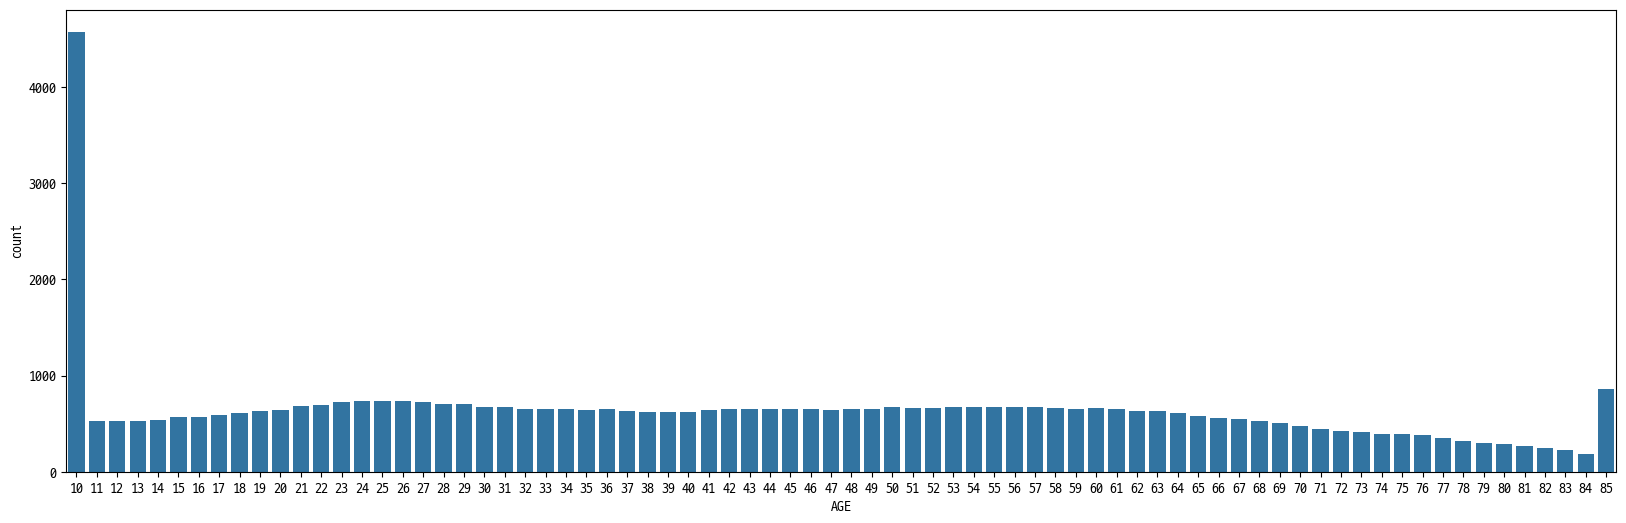

In [10]:
plt.figure(figsize=(20, 6))
sns.countplot(data=customer, x='AGE')
plt.show()

In [11]:
def get_age_group(age):
    if age == 10:
        return 0
    elif 11 <= age <= 19:
        return 1
    elif 20 <= age <= 29:
        return 2
    elif 30 <= age <= 39:
        return 3
    elif 40 <= age <= 49:
        return 4
    elif 50 <= age <= 59:
        return 5
    elif 60 <= age <= 69:
        return 6
    elif 70 <= age <= 79:
        return 7
    elif 80 <= age <= 89:
        return 8
    else:
        return age

customer['AGE_GROUP'] = customer['AGE'].apply(get_age_group)
customer.head()

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,AGE_GROUP
0,787068,1,1984,2,1,36,3
1,1630591,1,2010,2,1,10,0
2,746631,1,1985,1,1,35,3
3,936890,1,2010,1,1,10,0
4,1850766,1,1959,1,1,61,6


In [12]:
customer = customer.drop(columns=['BTH_YR'])
customer.head()

,JOIN_SN,JOIN_SN_TYP,GENDER,IS_KRN,AGE,AGE_GROUP
0,787068,1,2,1,36,3
1,1630591,1,2,1,10,0
2,746631,1,1,1,35,3
3,936890,1,1,1,10,0
4,1850766,1,1,1,61,6


AGE_GROUP
2    7085
5    6676
3    6486
4    6479
6    5916
1    5098
0    4576
7    3895
8    2074
Name: count, dtype: int64

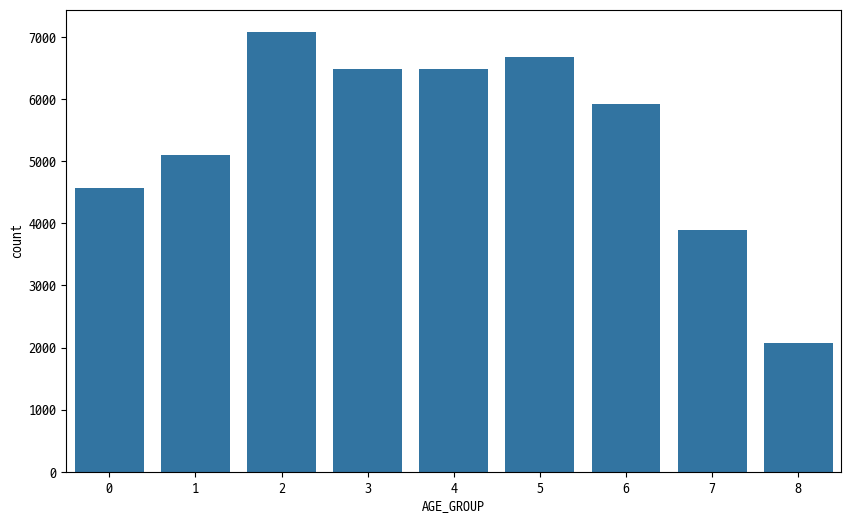

In [13]:
display(customer['AGE_GROUP'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=customer, x='AGE_GROUP')
plt.show()

### (3) IS_KRN == 1(내국인)

In [14]:
customer['IS_KRN'].value_counts()

IS_KRN
1    48285
Name: count, dtype: int64

### (4) 확인

In [15]:
print(customer.info())
print()
print(customer.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 48285 entries, 0 to 49133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JOIN_SN      48285 non-null  int64
 1   JOIN_SN_TYP  48285 non-null  int64
 2   GENDER       48285 non-null  int64
 3   IS_KRN       48285 non-null  int64
 4   AGE          48285 non-null  int64
 5   AGE_GROUP    48285 non-null  int64
dtypes: int64(6)
memory usage: 2.6 MB
None

            JOIN_SN  JOIN_SN_TYP        GENDER   IS_KRN           AGE  \
count  4.828500e+04      48285.0  48285.000000  48285.0  48285.000000   
mean   9.854018e+05          1.0      1.493777      1.0     41.708191   
std    5.657019e+05          0.0      0.499966      0.0     21.709034   
min    8.000000e+00          1.0      1.000000      1.0     10.000000   
25%    4.943420e+05          1.0      1.000000      1.0     23.000000   
50%    9.833740e+05          1.0      1.000000      1.0     41.000000   
75%    1.478727e+06   

In [16]:
display(customer['GENDER'].value_counts())
display(customer['IS_KRN'].value_counts())
display(customer['AGE_GROUP'].value_counts())

GENDER
1    24443
2    23842
Name: count, dtype: int64

IS_KRN
1    48285
Name: count, dtype: int64

AGE_GROUP
2    7085
5    6676
3    6486
4    6479
6    5916
1    5098
0    4576
7    3895
8    2074
Name: count, dtype: int64

### (5) 컬럼 정리 & 저장

In [17]:
customer = customer[['JOIN_SN', 'GENDER', 'AGE', 'AGE_GROUP']]
customer.head()

,JOIN_SN,GENDER,AGE,AGE_GROUP
0,787068,2,36,3
1,1630591,2,10,0
2,746631,1,35,3
3,936890,1,10,0
4,1850766,1,61,6


In [18]:
# customer.to_csv('customer.csv', index=False)

## 2. 보험계약관계자정보(SDB2_I_CT_RLPS) = rlps

### (1) 업권코드, 기관일련번호, 자사여부, 거주지역코드 drop

[참고] 거주지역코드는 추후 시각화할 때만 사용

In [19]:
rlps = rlps[['JOIN_SN', 'JOIN_SN_TYP', 'POL_SN', 'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD', 'IS_INDIV']]
rlps.head()

,JOIN_SN,JOIN_SN_TYP,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,IS_INDIV
0,1486482,1,1771111,C,99,1
1,15110,1,2197182,C,1,1
2,993239,1,2471577,C,99,1
3,1412979,1,5984883,I,1,1
4,451383,1,6088957,I,1,1


### (2) IS_INDIV == 1만 남긴후 컬럼 자체 드랍

In [20]:
rlps['IS_INDIV'].value_counts()

IS_INDIV
1    378021
0      1007
Name: count, dtype: int64

In [21]:
rlps = rlps[rlps['IS_INDIV'] == 1]
rlps['IS_INDIV'].value_counts()

IS_INDIV
1    378021
Name: count, dtype: int64

In [22]:
rlps = rlps[['JOIN_SN', 'JOIN_SN_TYP', 'POL_SN', 'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD']]
rlps.head()

,JOIN_SN,JOIN_SN_TYP,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD
0,1486482,1,1771111,C,99
1,15110,1,2197182,C,1
2,993239,1,2471577,C,99
3,1412979,1,5984883,I,1
4,451383,1,6088957,I,1


### (3) JOIN_SN_TYP == 1만 남긴후 컬럼 자체 드랍

In [23]:
rlps['JOIN_SN_TYP'].value_counts()

JOIN_SN_TYP
1    378021
Name: count, dtype: int64

In [24]:
rlps = rlps[['JOIN_SN', 'POL_SN', 'CT_RLPS_GBN_CD', 'CT_IN_RLTN_CD']]
rlps.head()

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD
0,1486482,1771111,C,99
1,15110,2197182,C,1
2,993239,2471577,C,99
3,1412979,5984883,I,1
4,451383,6088957,I,1


### (4) 계약관계자유형코드 + 관계코드

- 0: 계약자=피보험자=나
- 1: 계약자=나, 피보험자=타인
- 2: 계약자=타인, 피보험자=나
- 전처리한 후에 원래 컬럼은 드랍해도 됨

In [25]:
display(rlps['CT_RLPS_GBN_CD'].value_counts())
display(rlps['CT_IN_RLTN_CD'].value_counts())

CT_RLPS_GBN_CD
I    228594
C    149427
Name: count, dtype: int64

CT_IN_RLTN_CD
1     246689
99     88520
3      32686
2       9174
5        487
6        465
Name: count, dtype: int64

In [26]:
rlps['rltn_cd'] = 0
rlps.head(10)

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
0,1486482,1771111,C,99,0
1,15110,2197182,C,1,0
2,993239,2471577,C,99,0
3,1412979,5984883,I,1,0
4,451383,6088957,I,1,0
5,745358,566902,C,1,0
6,56423,254040,C,1,0
7,645834,1458120,I,3,0
8,1227942,4519678,C,1,0
9,559408,841128,I,5,0


In [27]:
rlps.loc[(rlps['CT_RLPS_GBN_CD'] == 'C') & (rlps['CT_IN_RLTN_CD'] == 1), 'rltn_cd'] = 0
rlps.loc[(rlps['CT_RLPS_GBN_CD'] == 'C') & (rlps['CT_IN_RLTN_CD'] != 1), 'rltn_cd'] = 1
rlps.loc[(rlps['CT_RLPS_GBN_CD'] == 'I') & (rlps['CT_IN_RLTN_CD'] != 1), 'rltn_cd'] = 2
rlps.loc[(rlps['CT_RLPS_GBN_CD'] == 'I') & (rlps['CT_IN_RLTN_CD'] == 1), 'rltn_cd'] = 0

In [28]:
rlps.head(20)

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
0,1486482,1771111,C,99,1
1,15110,2197182,C,1,0
2,993239,2471577,C,99,1
3,1412979,5984883,I,1,0
4,451383,6088957,I,1,0
5,745358,566902,C,1,0
6,56423,254040,C,1,0
7,645834,1458120,I,3,2
8,1227942,4519678,C,1,0
9,559408,841128,I,5,2


### (5) 계약관계자유형코드 + 관계코드 -> JOIN_SN 중복값 확인

In [29]:
rlps_over2 = rlps[rlps['JOIN_SN'] != 1]
rlps_over2.head()

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
0,1486482,1771111,C,99,1
1,15110,2197182,C,1,0
2,993239,2471577,C,99,1
3,1412979,5984883,I,1,0
4,451383,6088957,I,1,0


In [30]:
rlps_over2 = rlps_over2.sort_values(by=['JOIN_SN', 'POL_SN'])
rlps_over2.head(20)

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
220773,8,795034,I,1,0
253614,8,3700186,I,1,0
203593,8,6261020,I,99,2
235382,8,6261020,C,1,0
202174,8,6394418,I,99,2
212414,8,6614027,I,1,0
101299,8,7083655,I,1,0
176303,8,7699415,I,1,0
244852,8,7699415,C,1,0
367523,8,7795798,I,99,2


In [31]:
# JOIN_SN, POL_SN 둘 다 같은 경우만 일단 추출

rlps_dup = rlps_over2[rlps_over2.duplicated(subset=['JOIN_SN', 'POL_SN'], keep=False)]
rlps_dup.head(20)

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
203593,8,6261020,I,99,2
235382,8,6261020,C,1,0
176303,8,7699415,I,1,0
244852,8,7699415,C,1,0
93810,18,9494834,C,1,0
112634,18,9494834,I,1,0
112117,98,9922612,C,1,0
354740,98,9922612,I,1,0
297086,133,3919595,I,1,0
323698,133,3919595,C,99,1


In [32]:
display(rlps_over2.info())  # 378021행
display(rlps_dup.info())    # 250889행

<class 'pandas.core.frame.DataFrame'>
Index: 378021 entries, 220773 to 195435
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JOIN_SN         378021 non-null  int64 
 1   POL_SN          378021 non-null  int64 
 2   CT_RLPS_GBN_CD  378021 non-null  object
 3   CT_IN_RLTN_CD   378021 non-null  int64 
 4   rltn_cd         378021 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 17.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 250889 entries, 203593 to 195435
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   JOIN_SN         250889 non-null  int64 
 1   POL_SN          250889 non-null  int64 
 2   CT_RLPS_GBN_CD  250889 non-null  object
 3   CT_IN_RLTN_CD   250889 non-null  int64 
 4   rltn_cd         250889 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 11.5+ MB


None

CT_IN_RLTN_CD
1     207383
99     42562
3        822
2         96
6         16
5         10
Name: count, dtype: int64

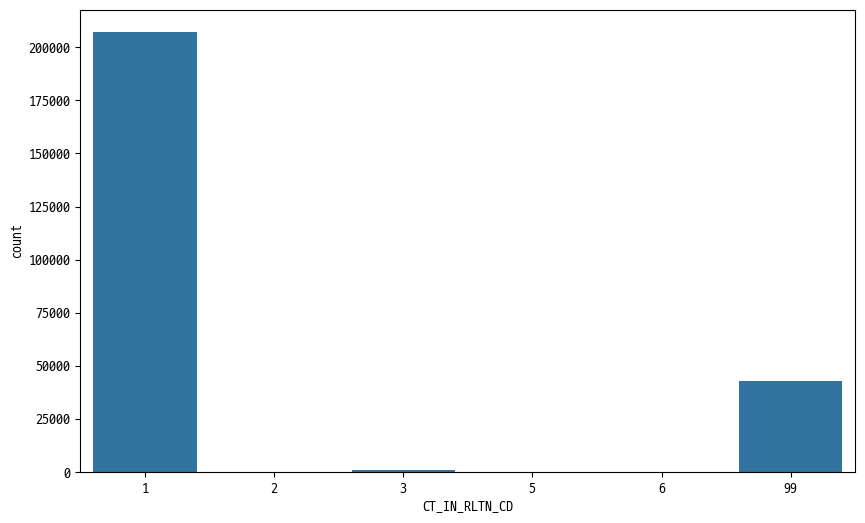

In [33]:
# 계약자 - 피보험자 관계 코드 분포
display(rlps_dup['CT_IN_RLTN_CD'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(data=rlps_dup, x='CT_IN_RLTN_CD')
plt.show()

### (6) 계약자-피보험자 관계의 이상치 탐지

1. 계-피관계코드에서 2, 3, 5, 6을 전부 99로 변경한다. ('타인'으로 묶어버리기)

2. rlps_dup(차주번호 및 증권번호가 완전히 같은 건만 모아놓은 테이블)에서 [C/I - 1/99] 간 관계의 케이스를 분류한다

3. 판단 -> 전처리한다

In [34]:
def get_2356to99(x):
    if x in [2, 3, 5, 6]:
        return 99
    elif x == 1:
        return 1
    else:
        return 99

rlps_dup['CT_IN_RLTN_CD'] = rlps_dup['CT_IN_RLTN_CD'].apply(get_2356to99)
rlps_dup['CT_IN_RLTN_CD'].value_counts()

C:\Users\LOVE\AppData\Local\Temp\ipykernel_29252\1351816897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlps_dup['CT_IN_RLTN_CD'] = rlps_dup['CT_IN_RLTN_CD'].apply(get_2356to99)


CT_IN_RLTN_CD
1     207383
99     43506
Name: count, dtype: int64

In [36]:
rlps_dup.head(20)

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,CT_IN_RLTN_CD,rltn_cd
203593,8,6261020,I,99,2
235382,8,6261020,C,1,0
176303,8,7699415,I,1,0
244852,8,7699415,C,1,0
93810,18,9494834,C,1,0
112634,18,9494834,I,1,0
112117,98,9922612,C,1,0
354740,98,9922612,I,1,0
297086,133,3919595,I,1,0
323698,133,3919595,C,99,1


모순 관계 일단 뜯어보기

1. 8, 6261020) I - 99   다른 사람이 계약했고 내가 피보험자임   +    C - 1 내가 계약잔데 내가 피보험자임
2. 8, 7699415) 계약자도 피보험자도 나   -> ok
3. 18, 949483) c 1 i 1 OK
4. 98, 9922612) C 1 I 1 OK
5. 133, 3919595) I 1 계약자도 피보험자도 나 + C 99 계약자는 나 피보험자는 타인
6. 133, 5384751) C 99 계약자는 나 피보험자도 타인 + I 1 계약자도 피보험자도 나 (5번과 똑같은 케이스)
7. 133, 7331882) 5번과 똑같은 케이스
8. 182	2895227) 5번과 똑같은 케이스

**🚫 문제 정의하기**
1. JOIN_SN - POL_SN이 정확히 같은 쌍: 반드시 로우가 2개이며 각각 C, I임

2. 모든 경우의 수
- 각 로우가 C - I 순서대로 있다고 했을 때
    - ✅ 0 - 0   (계약자=피보험자=나 - 계약자=피보험자=나)
    - 0 - 1  /  1 - 0  (계약자=피보험자=나 - 계약자=나, 피보험자=타인)
    - 0 - 2  /  2 - 0  (계약자=피보험자=나 - 계약자=타인, 피보험자=나)
    - 1 - 1   (계약자=나, 피보험자=타인  -  피보험자=나, 계약자=타인)
    - ✅ 1 - 2  /  2 - 1  (계약자=나, 피보험자=타인  -  계약자=타인, 피보험자=나)
    - 2 - 2   (계약자=타인, 피보험자=나   -   피보험자=타인, 계약자=나)


2. 모순 관계가 아닌 것
    - rltn_cd 기준, 두 로우가 다 0이어야 함 (계약자=피보험자=나)    (0-0)
    - rltn_cd 기준, 두 로우가 각각 1, 2여야 햠 (계약자=나, 피보험자=타인 / 계약자=타인, 피보험자=나) (1-2, 2-1)
        - = 0이 있으면 안 됨, 1만 있어도 안 됨, 2만 있어도 안 됨    

3. 모순 관계인 것
    - rltn_cd 기준, 두 로우에 0이 하나만 있는 것 (1-0, 2-0, 0-1, 0-2)
    - rltn_cd 기준, 두 로우 모두 1인 것 (1-1)
    - rltn_cd 기준, 두 로우 모두 2인 것 (2-2)


4. 의심 중인 것
    - 혹시 개인사업자여부가 영향을 미치는지?
        - 확인해보려면 나영님이 말씀하셨던 방법으로 확인 필요
        - 기업 정보에서 사업자번호 끌어와서 사업자번호가 있으면 개인사업자로도 볼 수 있어요
